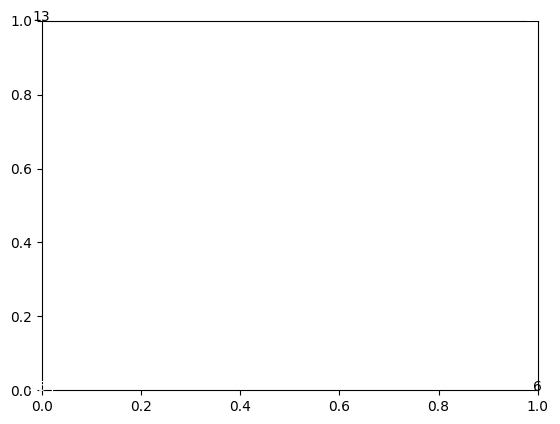

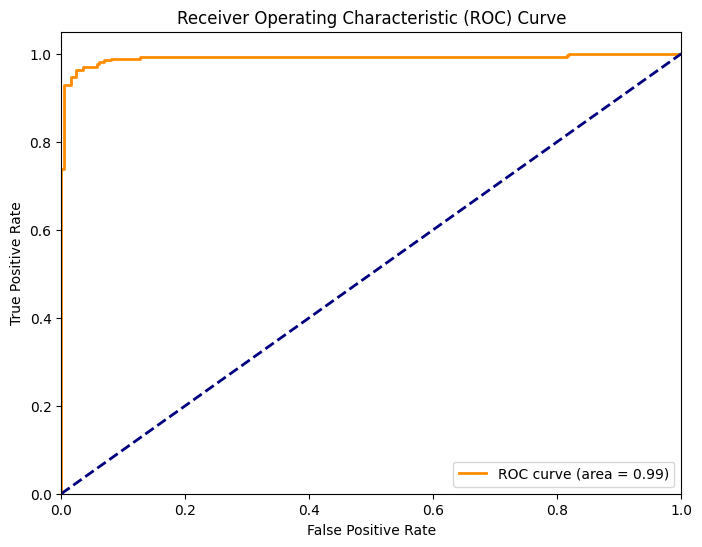

Accuracy: 0.9637404580152672
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       260
           1       0.98      0.95      0.96       264

    accuracy                           0.96       524
   macro avg       0.96      0.96      0.96       524
weighted avg       0.96      0.96      0.96       524



In [4]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import itertools
# Function to load and process images
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Load the image
            img = Image.open(os.path.join(folder_path, filename))
            
            # Resize the image if needed
            # img = img.resize((new_width, new_height))
            
            # Convert the image to a numpy array
            img_array = np.array(img).flatten()  # Flatten the array to use pixel values as features
            
            # Append the image array to the list of images
            images.append(img_array)
            
            # Assign label based on filename or any other logic
            label = 1 if "bleeding" in filename else 0  # Assuming filenames contain "bleeding" for bleeding images
            labels.append(label)

    return np.array(images), np.array(labels)

# Replace 'your_dataset_folder' with the path to your dataset
dataset_folder = './DatsetForUse'
X, y = load_images(dataset_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating an SVM classifier with a linear kernal
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train) #training the model

# testing the model
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix values on each cell
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)



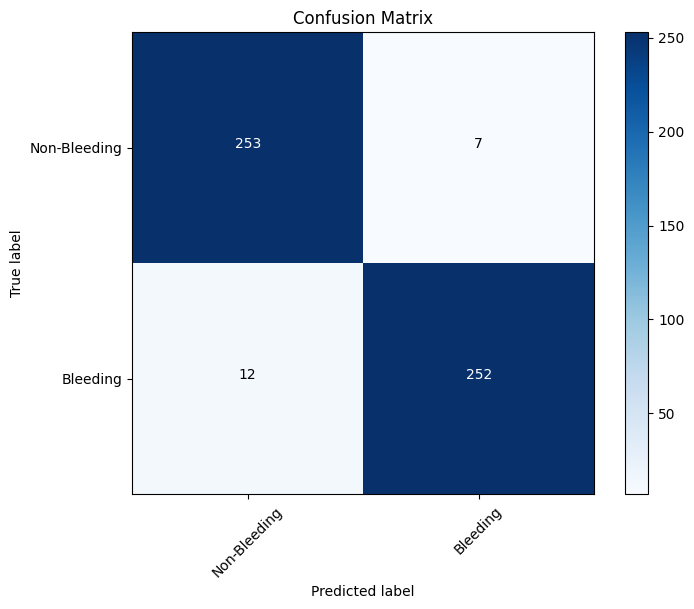

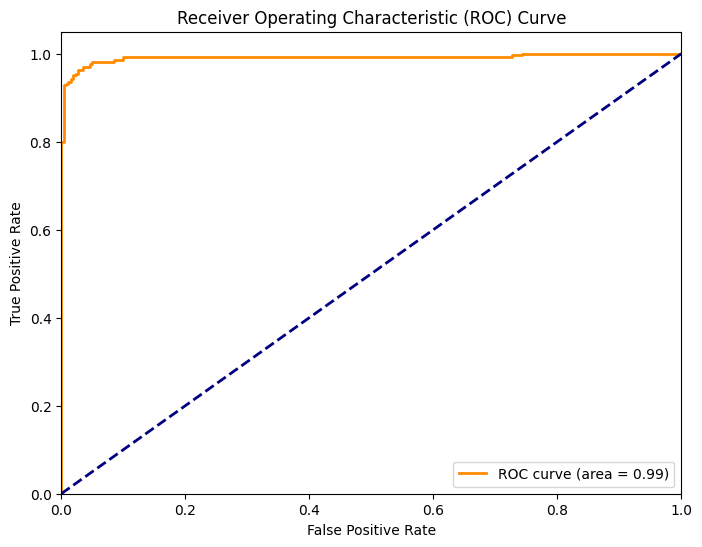

Accuracy: 0.9637404580152672
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       260
           1       0.97      0.95      0.96       264

    accuracy                           0.96       524
   macro avg       0.96      0.96      0.96       524
weighted avg       0.96      0.96      0.96       524



In [7]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Non-Bleeding', 'Bleeding']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Print the confusion matrix values on each cell
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)